<a href="https://colab.research.google.com/github/MatheusABomfim/Qualifica-o_ML_HTLV/blob/Under-sampling/MEST_HTLV%2BMBL2%2BCLINICAL_PreProcessing_and_defaultML_Avaliation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notes/reminders:

* Clinical data has been excluded
(because they will still be extracted from the medical records, classifying the oligosymptomatic patients separately, allowing a better evaluation of the machine)

* This script is based on the file: "Based on the ML Wine data set" with the appropriate modifications.

* It uses only one machine-learning evaluation model, several of which will be used in the final master's work. The current script corresponds to a training script developed in conjunction with pacific (more compleX).

# Dictionary:
* In column: SEX
  * M = 0
  * F = 1

* In column: HAM/TSP
 * No myelopathy = 0
 * HAM/TSP = 1

# Categorized data_1:
named as = cat_data_1

Creation of a new data table, transforming the binary variables referring to urinary dysfunctions into categorical numerical variables, exclusion of uninformative columns and categorization of pain subtypes. Including the conversion of "Hipereflexia" and "Hiperflexia em MMII", como somente "Hipereflexia.

Dictionary:
- Urinary_symptoms:
  - Polyuria: 1 +
  - Neurogenic bladder: 2 +
  - Neurogenic bladder + urinary incontinence:3
  - Nocturia: 4 +
  - Nocturia + urinary incontinence: 5
  - Dysuria: 6
  - Dysuria + neurogenic bladder: 7

- Pain:
  - non-specific pain: 1
  - joint pain: 2
  - lower back pain: 3
  - lower limb pain: 4
  - lower limb pain + other site of pain: 5

- Weakenes:
  - normal levels of strength: 0
  - weakness or lost of stregth: 1

- Wandering:
  - normal walking: 0
  - abnormal walking: 1
  
  At this point, df is the new data set with the change in the selected characteristics

  cat_data_2
  Mesma coisa de cat_data 1, porém sem categorização de dor, deambulação e fraqueza

In [ ]:
# Att Scikit-learn
!pip install scikit-learn==1.0.2
!pip install imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.5/26.5 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.5.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.0.2 which is incompatible.


In [155]:
# Import data and packages for work:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, recall_score, accuracy_score,roc_curve, auc, make_scorer, precision_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.datasets import make_classification
import pandas as pd
from scipy.stats import skew, kurtosis
import shutil
import os
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import learning_curve, train_test_split, StratifiedShuffleSplit
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows

# Data selection
inicial_dataset = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/Clean_data_HAM_TSP.csv')
cat_data_1 = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/df_cat.csv')
cat_data_2 = ('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Results_ML_MBL2_12_01_24/Data sets and Models/df_cat_2.csv')

# Ignoring flags
import warnings
warnings.filterwarnings('ignore')

# Importing and processing data:

In [174]:
# Import initial file "Clean_data_HAM_TSP"
#df = pd.read_table(inicial_dataset, sep='.')  # inicial_dataset
df = pd.read_table(cat_data_1, sep=',')  # cat_data_1
#df = pd.read_table(cat_data_2, sep='.')  # cat_data_2

In [124]:
# Checking the data frame
print(df)
#df.columns

     NUM AMO REGISTRO SEXO  Idade 2018 (2019 AZUL) HAM/TSP  MBL-550  MBL -221  \
0        147    82745    M                      68     NÃO        1         0   
1         57   532330    F                      32     NÃO        0         0   
2        145   647079    M                      54     NÃO        2         1   
3         85   591033    M                      36     NÃO        1         0   
4         54   532334    M                      41     NÃO        1         1   
..       ...      ...  ...                     ...     ...      ...       ...   
150      154   665127    F                      76     NÃO        2         0   
151       39   457154    F                      63     NÃO        1         0   
152      190   601231    F                      82     NÃO        1         0   
153      186   687271    M                      62     NÃO        2         0   
154       25   558581    F                      53     NÃO        2         0   

     MBL EXON     SINTOMAS 

In [166]:
# Transformation of categorical nominal data into categorical numerical data:
df['SEXO'] = df['SEXO'].replace('M',0)
df['SEXO'] = df['SEXO'].replace('F',1)
df['HAM/TSP'] = df['HAM/TSP'].replace('NÃO',0)
df['HAM/TSP'] = df['HAM/TSP'].replace('SIM',1)

# Elimination of data that is cloudy:
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]
df_filtered = df[df['HAM/TSP'].isin(['1', '0'])]

# Delete columns that will not be used:
df = df.drop('SINTOMAS', axis=1)
#df = df.drop('SINT. DET.', axis=1)
#df = df.drop('ANO DE DIAGNOSTICO', axis=1)
df = df.drop('REGISTRO', axis=1)
df = df.drop('NUM AMO', axis=1)
#df = df.drop('Baixo fluxo urinário', axis=1)
df = df.drop('Câimbras', axis=1)
df = df.drop('Edema MMSS', axis=1)

# Transforming string data into float64:
df['HAM/TSP'] = pd.to_numeric(df['HAM/TSP'],errors = 'coerce')

# Removal of rows with null values:
df = df.dropna()

KeyError: 'SEXO'

In [175]:
df = df.rename(columns={'parestesia':'Parestesia'})
df = df.rename(columns={'dificuldade de deambular':'Dificuldade de deambular'})
df = df.rename(columns={'artrose':'Artrose'})
df = df.rename(columns={'Espasticidade ou marcha espástica':'Espasticidade'})
df = df.rename(columns={'Perda de força e fraqueza':'Fraqueza'})
df = df.rename(columns={'Dificuldade de deambular':'Deambulação'})
df = df.rename(columns={'Idade 2018 (2019 AZUL)':'Idade'})

In [168]:
#df.columns
print(df)

     Sexo  HAM/TSP  MBL-550  MBL -221  MBL EXON  Sintomas urinários  Idade  \
0       0        0        1         0         2                   6     68   
1       1        0        0         0         1                   0     32   
2       0        0        2         1         0                   0     54   
3       0        0        1         0         0                   0     36   
4       0        0        1         1         1                   0     41   
..    ...      ...      ...       ...       ...                 ...    ...   
148     1        0        2         0         0                   0     76   
149     1        0        1         0         0                   0     63   
150     1        0        1         0         0                   0     82   
151     0        0        2         0         0                   0     62   
152     1        0        2         0         0                   0     53   

     Dor  Parestesia  Paresia  ...  Deambulação  Espasticidade 

# **Exploratory analysis**


Target frequency distribution (HAM/TSP)

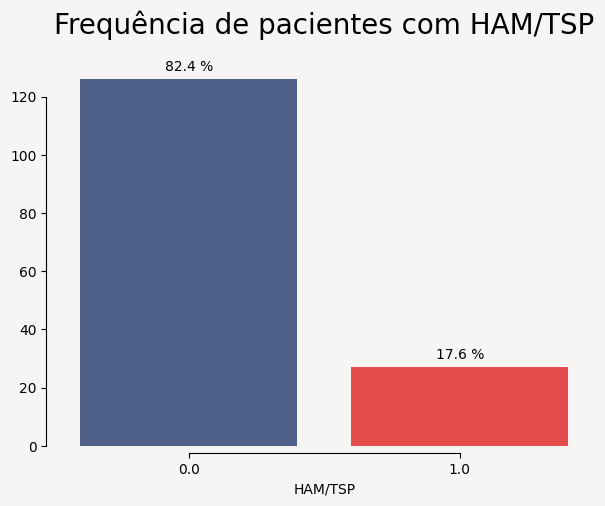

In [159]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Color palette
mypal = ['#465d91', '#FFFFE0', '#FF3232']

# Bar Graph for Distribution of Variables
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
total = float(len(df))
ax = sns.countplot(x=df['HAM/TSP'], palette=mypal[0::2])
ax.set_facecolor('#F6F5F4')

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 3, '{:1.1f} %'.format((height / total) * 100), ha="center")

ax.set_title('Frequência de pacientes com HAM/TSP', fontsize=20, y=1.05)
ax.set_ylabel('')
sns.despine(right=True)
sns.despine(offset=5, trim=True)

# Save the graphic in JPEG
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Exploratory Analysis/' + 'Frequência_HAM_TSP.jpeg')

# Show the graphic
plt.show()

Pearson correlation matrix initial dataset (heatmap):

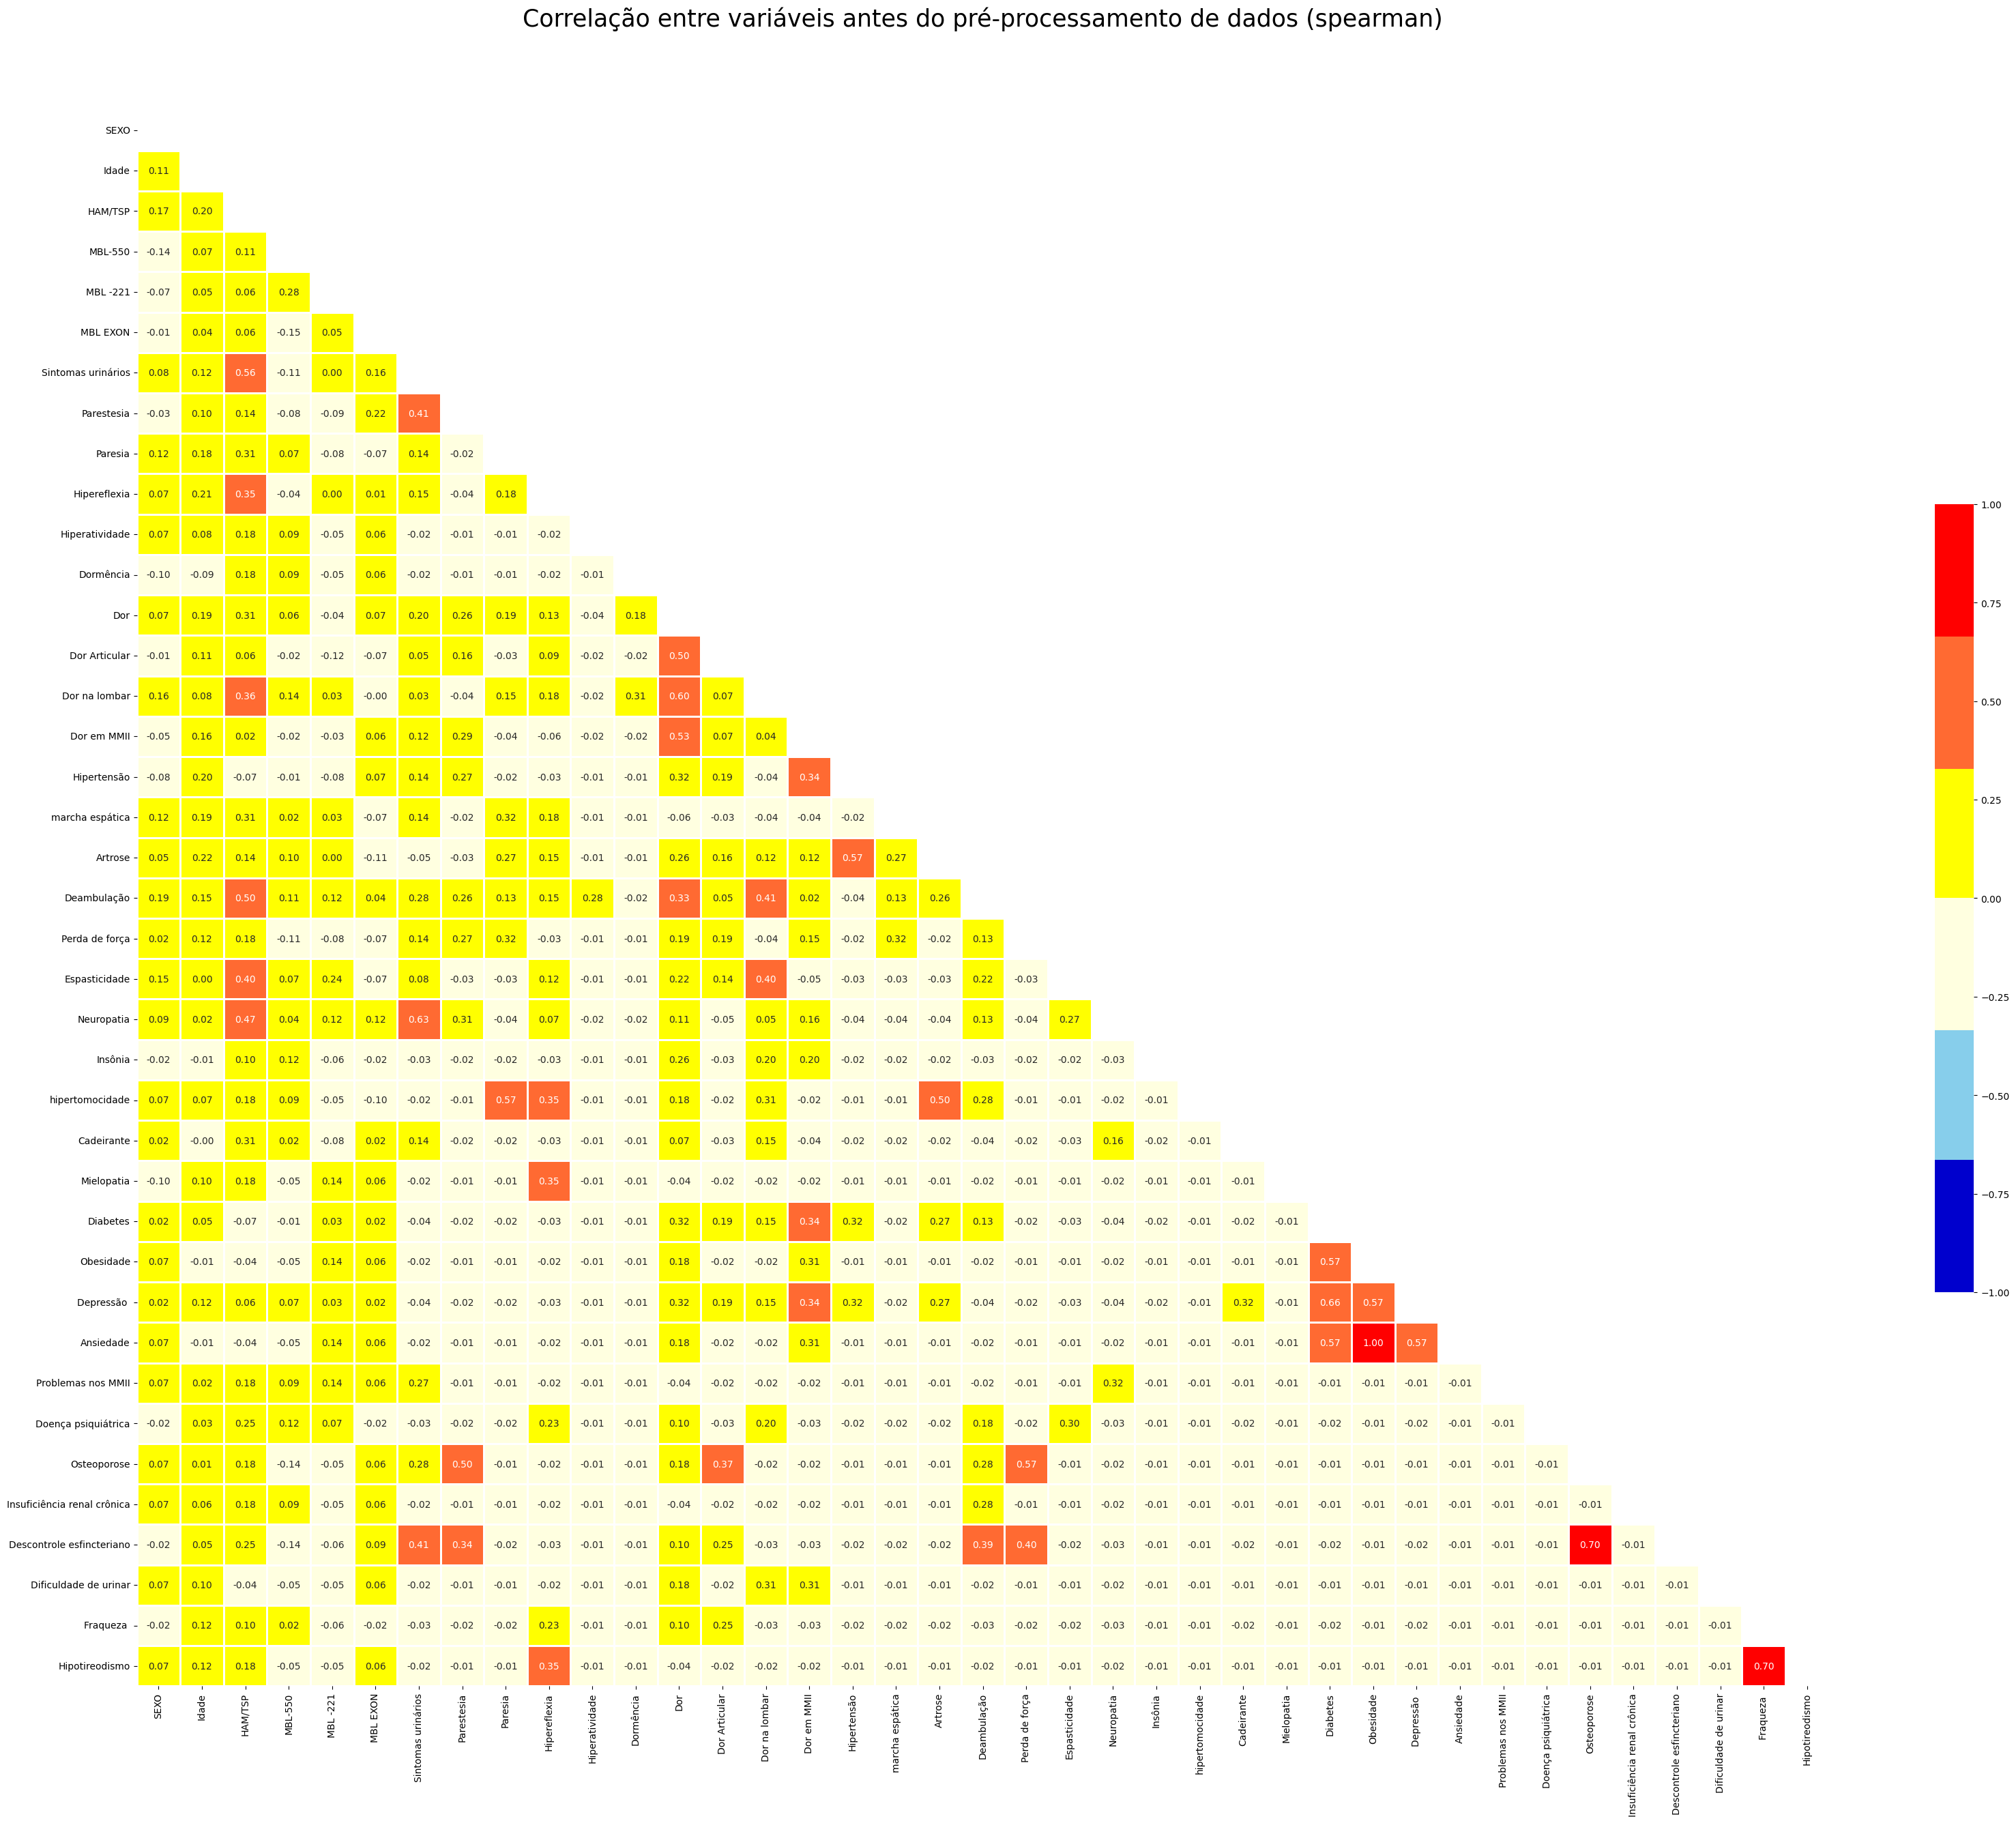

In [127]:
# Correlation
mypal= ['#0000CD', '#87CEEB', '#FFFFE0','#FFFF00', '#ff6a32','#FF0000']
metodo_correlacao = "spearman"
df_ = df

corr = df_.corr(method= metodo_correlacao)
mask = np.triu(np.ones_like(corr, dtype=bool))
f, aX = plt.subplots(figsize=(40, 30), facecolor=None)
cmap = sns.color_palette(mypal, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, vmin=-1.0, center=0, annot=True,
            square=False, linewidths=1, cbar_kws={"shrink": 0.5}, fmt='.2f')
aX.set_title("Correlação entre variáveis antes do pré-processamento de dados ("+metodo_correlacao+")", fontsize=25, y= 1.05);


# Save the graphic in PDF
plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Exploratory Analysis/' + 'initial_df_plot_heatmap_corr_pearson.pdf')

plt.show()

In [11]:
# Count the total number of patients with HAM/TSP in relation to DataFrame 'y'
pacientes_com_HAM_feminino = ((df['SEXO'] == 1) & (df['HAM/TSP'] == 1)).sum()
print(f'Pacientes do sexo Feminino com HAM/TSP: {pacientes_com_HAM_feminino}')

# Count the total number of male patients without HAM/TSP
pacientes_com_HAM_masculino = ((df['SEXO'] == 0) & (df['HAM/TSP'] == 1)).sum()
print(f'Pacientes do sexo Masculino com HAM/TSP: {pacientes_com_HAM_masculino}')

# Count the total number of female patients without HAM/TSP
pacientes_sem_HAM_feminino = ((df['SEXO'] == 1) & (df['HAM/TSP'] == 0)).sum()
print(f'Pacientes do sexo Feminino sem HAM/TSP: {pacientes_sem_HAM_feminino}')

# Count the total number of male patients without HAM/TSP
pacientes_sem_HAM_masculino = ((df['SEXO'] == 0) & (df['HAM/TSP'] == 0)).sum()
print(f'Pacientes do sexo Masculino sem HAM/TSP: {pacientes_sem_HAM_masculino}')


Pacientes do sexo Feminino com HAM/TSP: 21
Pacientes do sexo Masculino com HAM/TSP: 6
Pacientes do sexo Feminino sem HAM/TSP: 71
Pacientes do sexo Masculino sem HAM/TSP: 55


# **Data splitting and class balancing by undersampling (RandomUnderSampler)**

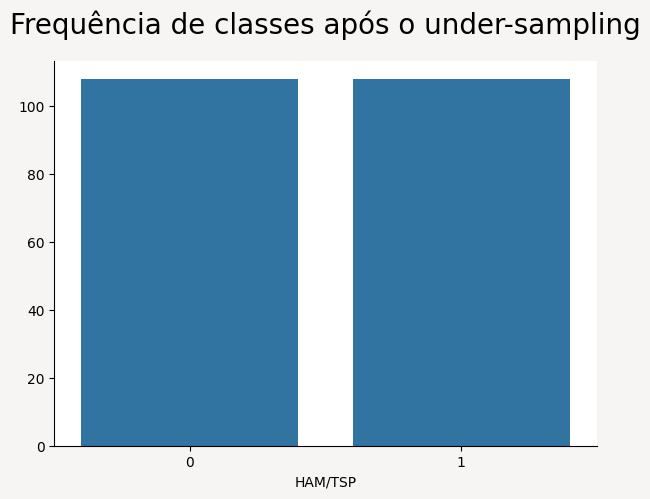

In [181]:
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define target and predictor variables
y = df['HAM/TSP'] # Target variable
X = df.drop('HAM/TSP', axis=1) # Predictor variables

# Split the data into folds using stratified cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=42, sampling_strategy='majority', replacement=True)

# Lists to store the resampled training data
X_train_resampled_list = []
y_train_resampled_list = []

# Iterate on the folds
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Apply RandomUnderSampler to the training set only
    X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

    # Store resampled data
    X_train_resampled_list.append(X_train_resampled)
    y_train_resampled_list.append(y_train_resampled)

# Concatenate all resampled training data
X_train_resampled_all = pd.concat(X_train_resampled_list)
y_train_resampled_all = pd.concat(y_train_resampled_list)

# Plot the count graph
plt.figure(figsize=(7, 5), facecolor='#F6F5F4')
ax = sns.countplot(x=y_train_resampled_all)
ax.set_title('Frequência de classes após o under-sampling', fontsize=20, y=1.05)
ax.set_ylabel('')
sns.despine(right=True)
plt.show()


# **Data scaling**

In [177]:
from sklearn.preprocessing import MinMaxScaler

# Criar uma instância do MinMaxScaler
scaler = MinMaxScaler()

# Extrair a coluna 'Idade' do DataFrame X_train_resampled e transformá-la em uma matriz bidimensional
idade_column = X_train_resampled[['Idade']]

# Ajustar o scaler aos dados e transformá-los
idade_scaled = scaler.fit_transform(idade_column)

# Criar um novo DataFrame para armazenar os dados escalados
X_train_resampled_scaled = X_train_resampled.copy()

# Substituir a coluna 'Idade' original pelos dados escalados
X_train_resampled_scaled['Idade'] = idade_scaled

# X_train_resampled_scaled agora contém apenas a coluna 'Idade' escalada, mantendo as outras colunas inalteradas


In [ ]:
#!pip uninstall scikit-learn
#!pip install --upgrade scikit-learn

In [171]:
print(X_train_resampled_scaled)

    Sexo  MBL-550  MBL -221  MBL EXON  Sintomas urinários     Idade  Dor  \
0      1        2         0         1                   0  0.571429    0   
1      1        0         0         1                   0  0.204082    0   
2      1        1         0         1                   0  0.632653    0   
3      1        1         0         1                   0  0.285714    0   
4      0        2         0         0                   0  0.693878    0   
5      1        2         0         0                   0  0.244898    0   
6      1        0         0         0                   0  0.673469    0   
7      0        2         0         0                   0  0.489796    0   
8      1        2         0         0                   0  0.714286    3   
9      0        1         0         2                   6  0.897959    4   
10     1        2         1         0                   0  0.122449    0   
11     1        1         0         0                   0  0.571429    0   
12     1    

# **List of ML packages that we will run**

In [162]:
# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state=42),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    SVC(kernel='rbf', random_state=42),
    MLPClassifier(random_state=42),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'SVM (RBF Kernel)',
    'Neural Network',
]

# **Feature selection**

In [178]:
# Initialize list to store all results
all_results = []

# Test different values of "k" for SelectKBest
for k in range(1, X_train_resampled.shape[1] + 1):  # Testar de 1 até o número total de características
    # Selecionar as melhores "k" características
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test)

    # Initialize list to store results for each classifier
    resultados = []

    # Iterate over the classifiers
    for item, nome in zip(classifiers, names):
        # Create and train the model
        item.fit(X_train_selected, y_train_resampled)

        # Making predictions
        y_pred = item.predict(X_test_selected)

        # Calculate confusion matrix
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

        # Calcular sensibilidade e especificidade
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        # Calculate G-mean
        g_mean = np.sqrt(sensitivity * specificity)

        resultados.append((nome, g_mean))

    all_results.append((k, resultados))

# Create a DataFrame to store the resultss
df_results = pd.DataFrame(columns=["k"] + names)

# Add the results to the DataFrame
for k, resultados in all_results:
    g_means = [g_mean for _, g_mean in resultados]
    df_results.loc[k] = [k] + g_means

# Calculate the average of each row, excluding the first two columns
df_results["mean"] = df_results.iloc[:, 2:].mean(axis=1)

# Select the five lines with the highest averages
top_5_mean = df_results.nlargest(5, "mean")

# Create an Excel file
wb = Workbook()

# Add the first tab with the results
ws1 = wb.active
ws1.title = "Resultados"

# Add the results to Excel
for r in dataframe_to_rows(df_results, index=True, header=True):
    ws1.append(r)

# Create the second tab for the five lines with the highest averages
ws2 = wb.create_sheet(title="Top 5 Médias")

# Add the results to Excel
for r in dataframe_to_rows(top_5_mean, index=True, header=True):
    ws2.append(r)

# Iterate on the 5 best results
#top = sorted(all_results, key=lambda x: x[1], reverse=True)[:5]
for idx, (k, _) in enumerate(top_5_mean.iterrows(), start=1):
    # Create a new tab for this k value
    ws_new = wb.create_sheet(title=f"k={k}")

    # Select the variables corresponding to this value of k
    X_train_selected_k = X_train_resampled.iloc[:, :k]

    # Get the names of the selected characteristics
    selected_features = list(X_train_resampled.columns[selector.get_support()])

    # Convert the selected variables to a pandas DataFrame
    df_selected_k = pd.DataFrame(X_train_selected_k, columns=[f"Feature_{i}" for i in range(1, k+1)])

    # Add the names of the selected features as a header
    ws_new.append(selected_features)

    # Add the data to Excel
    for row in dataframe_to_rows(df_selected_k, index=False, header=True):
        ws_new.append(row)

    # Add the feature numbers below the column names
    feature_numbers = [i for i in range(1, k+1)]
    ws_new.append(feature_numbers)

# File name
feature_selection = "resultados_feature_selection.xlsx"

# Save the Excel file
wb.save(feature_selection)

# Target directory in Google Drive
destination_dir = "/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Feature selection/"

# Copy the file to the destination directory, overwriting if it already exists
shutil.copyfile(feature_selection, os.path.join(destination_dir, feature_selection))

'/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Feature selection/resultados_feature_selection.xlsx'

# **Evaluation of multicollinearity**

In [179]:
# Adds a column of constants to the DataFrame
df_with_const = add_constant(pd.DataFrame(X_train_resampled, columns=X_train_resampled.columns))

# List for storing VIF results
vif_data = []

# Function to calculate the VIF in relation to the 'HAM/TSP' column
def calculate_vif(column_index):
    return variance_inflation_factor(df_with_const.values, column_index)

# Calculate the VIF for each variable in relation to the 'HAM/TSP' column
for i, column in enumerate(df_with_const.columns):
    if column != 'const' and column != 'HAM/TSP':
        vif = calculate_vif(i)
        vif_data.append((column, vif))

# Convert the results into a DataFrame
vif_df = pd.DataFrame(vif_data, columns=["Variable", "VIF"])

# Save the DataFrame in an Excel file
caminho_arquivo = '/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Pós-qualificação/Feature selection/VIF_data.xlsx'
vif_df.to_excel(caminho_arquivo, index=False)

In [ ]:
print(df)

In [ ]:
# Data division
# Binary categorical data
cat_bin = ['Sexo', 'Idade', 'HAM/TSP', 'Sintomas urinários', 'Dor',
        'parestesia', 'Paresia', 'HiperefleXia',
       'dificuldade de deambular', 'Espasticidade ou marcha espástica',
       'Perda de força e fraqueza', 'Hipertensão', 'artrose', 'Neuropatia',
       'Insônia', 'Cadeirante', 'Diabetes', 'Depressão ']

# Multiple categorical data
cat_mult= ['MBL-550', 'MBL -221', 'MBL EXON']

# All data
all_data = cat_bin + cat_mult

#**Cross-validation + ROC Curve + Mean AUC for default hyperparameters**


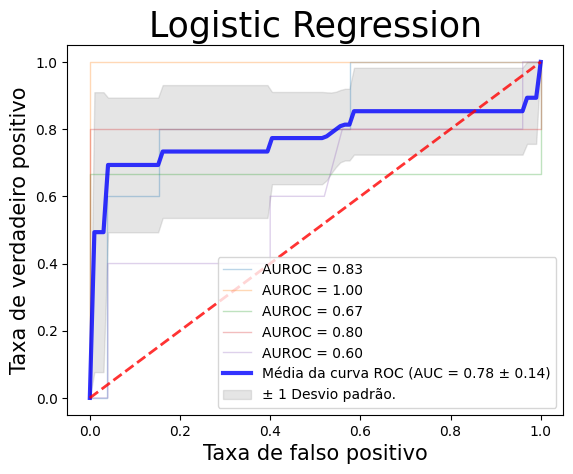

Média da precisão: 0.7777777777777778
Media do desvio padrão: 0.3063121944908938
Média da acurácia: 0.8621505376344087
Media da taxa de recall: 0.52
Media do parâmetro f1: 0.5738816738816739


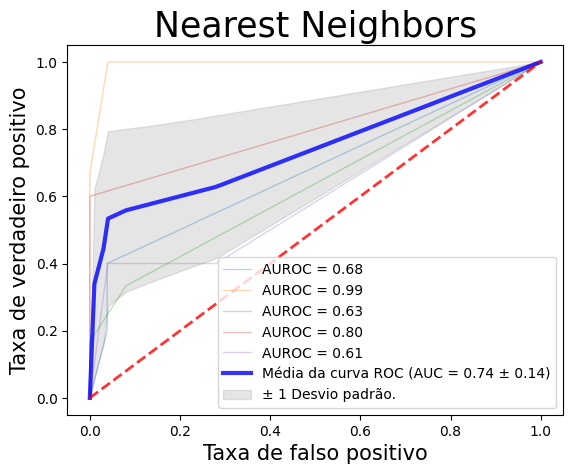

Média da precisão: 0.8333333333333334
Media do desvio padrão: 0.21081851067789195
Média da acurácia: 0.8759139784946235
Media da taxa de recall: 0.3666666666666667
Media do parâmetro f1: 0.4885714285714286


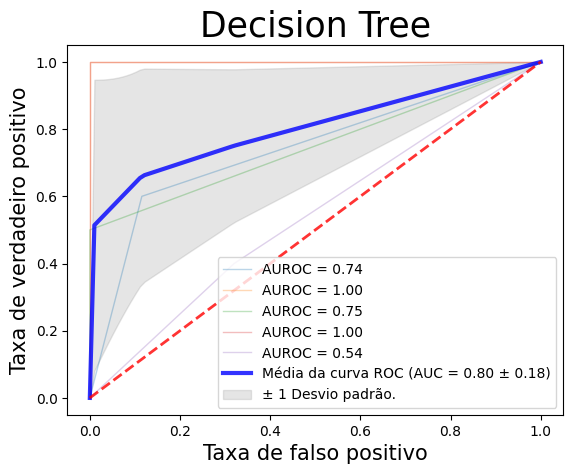

Média da precisão: 0.74
Media do desvio padrão: 0.332264954516723
Média da acurácia: 0.8750537634408602
Media da taxa de recall: 0.7
Media do parâmetro f1: 0.6957575757575757


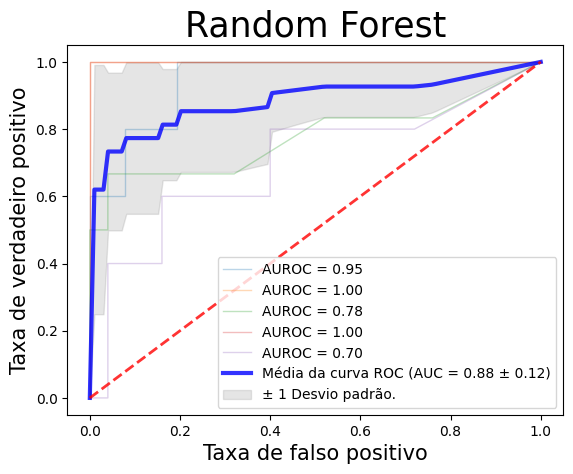

Média da precisão: 0.8357142857142857
Media do desvio padrão: 0.22542476911513573
Média da acurácia: 0.9015053763440861
Media da taxa de recall: 0.6266666666666667
Media do parâmetro f1: 0.6833333333333333


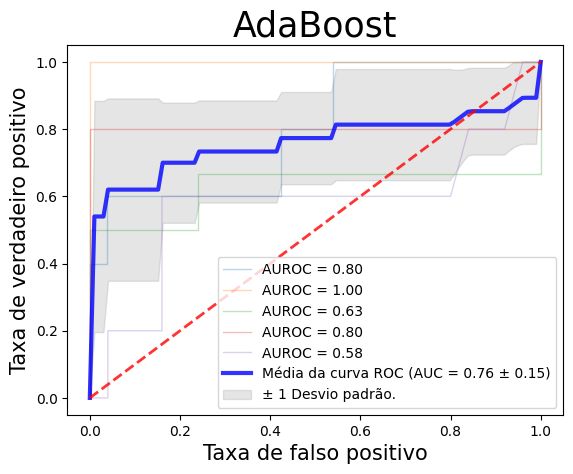

Média da precisão: 0.7866666666666667
Media do desvio padrão: 0.2745501370929867
Média da acurácia: 0.8883870967741936
Media da taxa de recall: 0.5866666666666667
Media do parâmetro f1: 0.657878787878788


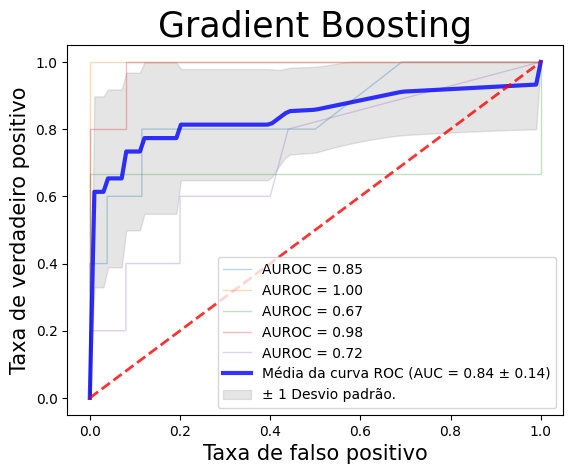

Média da precisão: 0.7771428571428571
Media do desvio padrão: 0.2904746291917448
Média da acurácia: 0.8883870967741936
Media da taxa de recall: 0.6266666666666667
Media do parâmetro f1: 0.6644444444444445


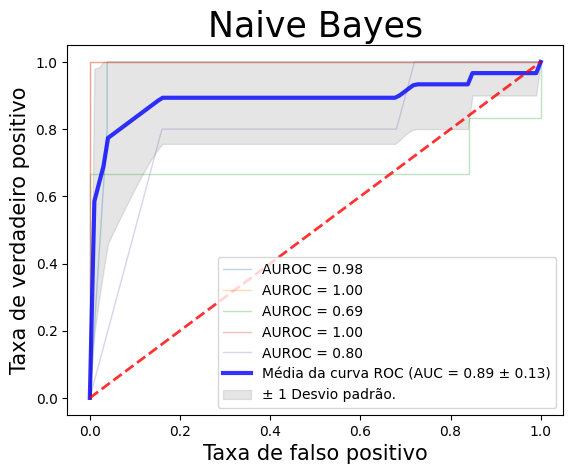

Média da precisão: 0.8466666666666667
Media do desvio padrão: 0.23247461032216923
Média da acurácia: 0.9273118279569893
Media da taxa de recall: 0.8533333333333333
Media do parâmetro f1: 0.8262626262626263


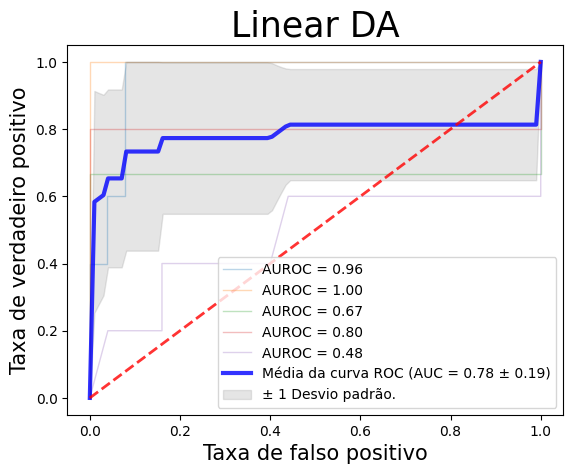

Média da precisão: 0.7777777777777778
Media do desvio padrão: 0.3063121944908938
Média da acurácia: 0.8683870967741937
Media da taxa de recall: 0.5933333333333333
Media do parâmetro f1: 0.6344155844155843


In [ ]:
# Clearing old data from the data_table, if the code has been run previously
data_table = pd.DataFrame()

# Creating the avaliatives metrics for ROC curve
for item, nome in zip(classifiers, names):
    tprs = []
    aucs = []
    f1_m = []
    mean_fpr = np.linspace(0, 1, 100)

# Testing the model
    for fold, (train_indeX, test_indeX) in enumerate(skf.split(X, y)): # metrics
        X_train, X_test = X.iloc[train_indeX], X.iloc[test_indeX]
        y_train, y_test = y.iloc[train_indeX], y.iloc[test_indeX]
        item.fit(X_train, y_train)

# Ploting avaliative metrics of ROC curve
        y_proba = item.predict_proba(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba[:, 1])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, lw=1, alpha=0.3, label=f"AUROC = {roc_auc:.2f}")
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        aucs.append(roc_auc)

    mean_tpr = np.mean(tprs, aXis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b', label=f"Média da curva ROC (AUC = {mean_auc:.2f} ± {std_auc:.2f})", lw=3, alpha=0.8)

    std_tpr = np.std(tprs, aXis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maXimum(mean_tpr - std_tpr, 0)


    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=0.2, label='± 1 Desvio padrão.')
    plt.Xlabel('TaXa de falso positivo', fontsize=15)
    plt.ylabel('TaXa de verdadeiro positivo', fontsize=15)
    plt.title(nome, fontsize=25)
    plt.legend(loc="lower right")
    plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Qualificação/ROC Curve/' + 'Curva ROC ' + nome + '.jpeg')
    plt.show()


# Calculation and print of F1 and associated metrics
    precision_mean_score = cross_val_score(item, X, y, scoring="precision", cv=5).mean()
    std_score = cross_val_score(item, X, y, scoring="precision", cv=5).std()
    accuracy_mean_score = cross_val_score(item, X, y, scoring="accuracy", cv=5).mean()
    recall_mean_score = cross_val_score(item, X, y, scoring="recall", cv=5).mean()
    f1_mean_score = cross_val_score(item, X, y, scoring="f1", cv=5).mean()

    print(f"Média da precisão: {precision_mean_score}")
    print(f"Media do desvio padrão: {std_score}")
    print(f"Média da acurácia: {accuracy_mean_score}")
    print(f"Media da taXa de recall: {recall_mean_score}")
    print(f"Media do parâmetro f1: {f1_mean_score}")

# Creating the data frames that  values to be saved
    results_mean_precision = pd.DataFrame({'Precision Mean': [precision_mean_score]})
    results_mean_accuracy = pd.DataFrame({'Accuracy Mean': [accuracy_mean_score]})
    results_mean_recall = pd.DataFrame({'Recall Mean': [recall_mean_score]})
    results_mean_f1 = pd.DataFrame({'F1 Mean': [f1_mean_score]})

# Creating the data frames (with the values of interest) that will be plotted in tXt file
    f1_metrics = pd.DataFrame(
    [{
        "Nome": nome,
        "Accuracy": results_mean_accuracy.iloc[0]['Accuracy Mean'],
        "Recall": results_mean_recall.iloc[0]['Recall Mean'],
        "Precision": results_mean_precision.iloc[0]['Precision Mean'],
        "F1 Score": results_mean_f1.iloc[0]['F1 Mean'],
    }]
)
    f1_m.append(f1_metrics)
    data_table = pd.concat(f1_m, ignore_indeX=True)
data_table = np.round(data_table.reset_indeX(drop=True), 2)

# Aesthetic transformation similar to a heatmap
styled_table = data_table.sort_values(by='Accuracy', ascending=False)\
      .style.background_gradient(cmap='coolwarm')\
      .bar(subset=['Recall'], color='#ff355d')\
      .bar(subset=['Precision'], color='lightseagreen')\
      .bar(subset=['F1 Score'], color='gold')\

# Save the generated eXcel file
styled_table.to_eXcel('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Qualificação/F1 metrics/'+"F1_metrics.XlsX", engine='openpyXl')

# **Confunsion matriX**

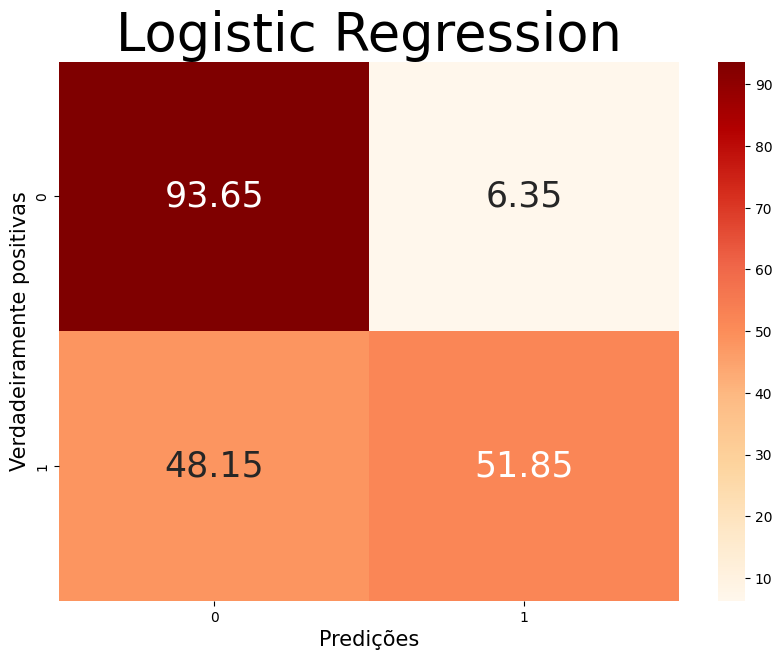

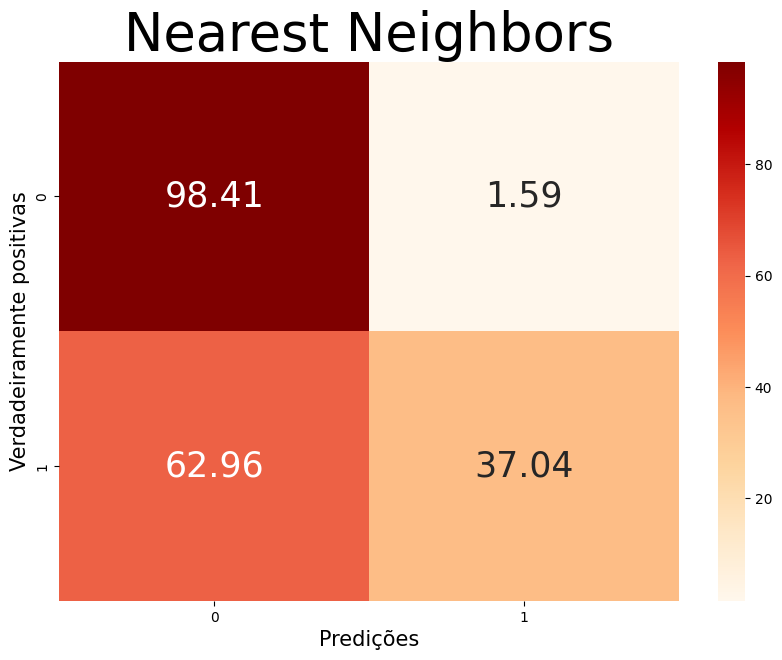

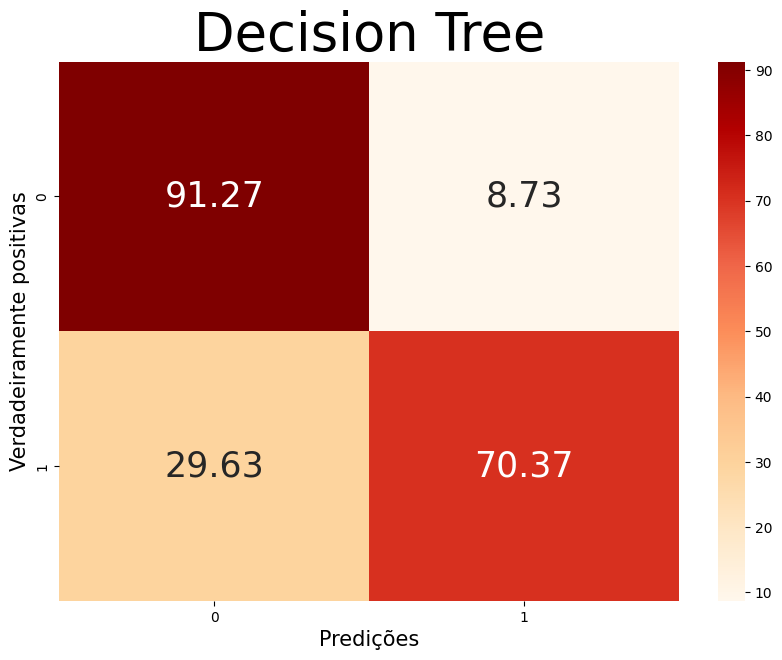

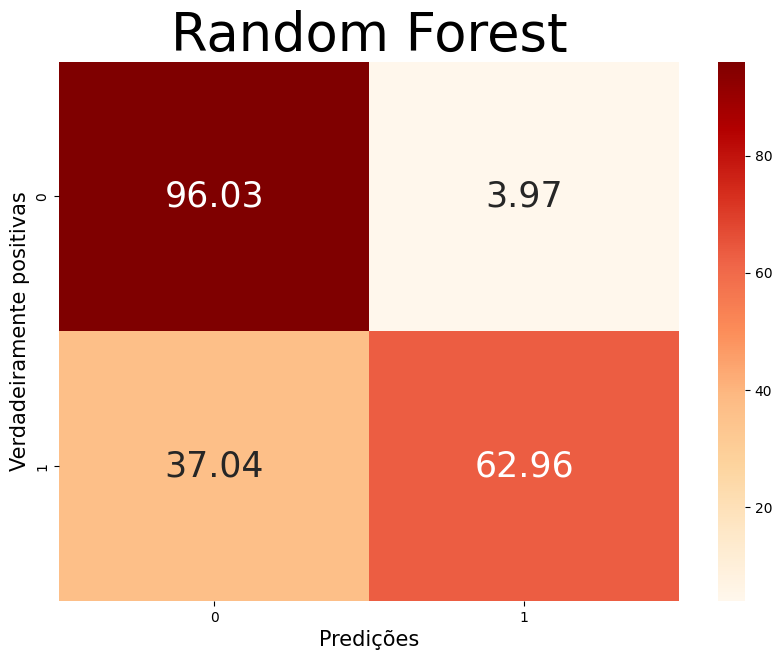

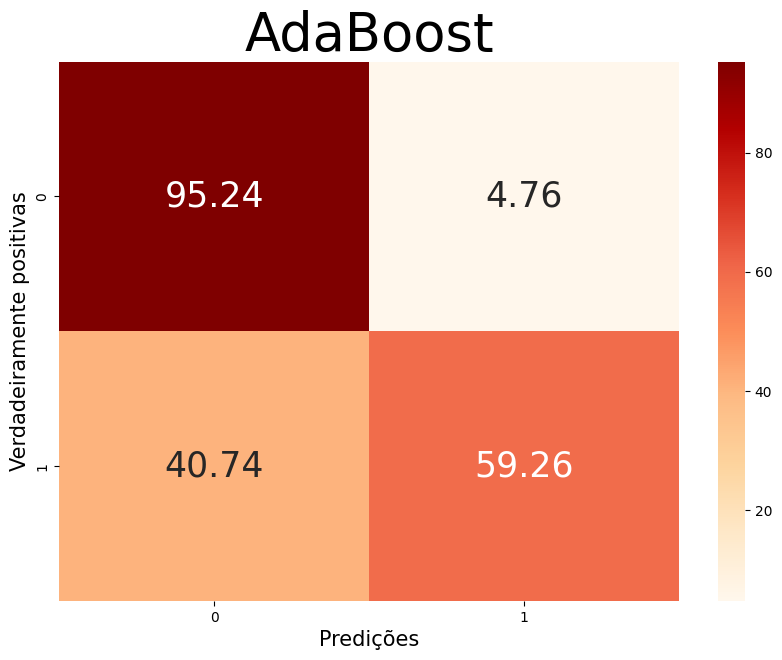

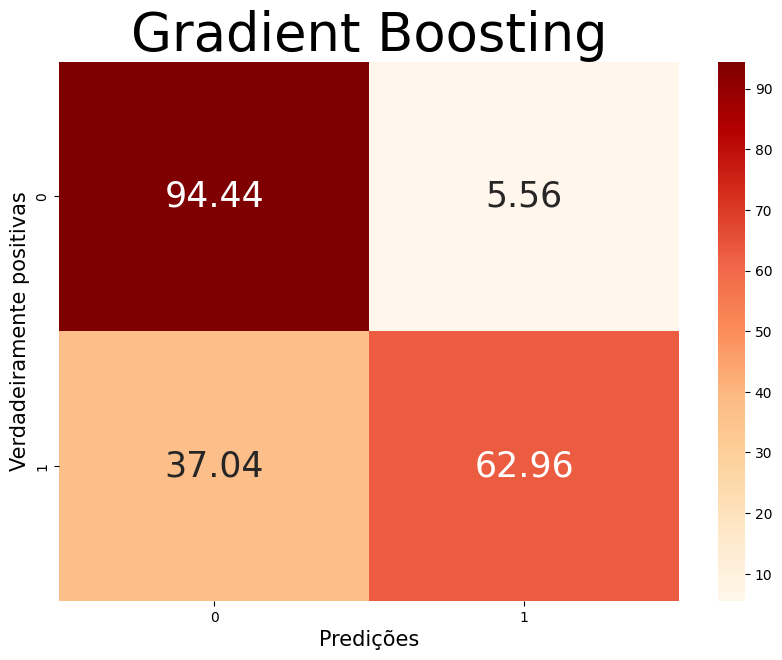

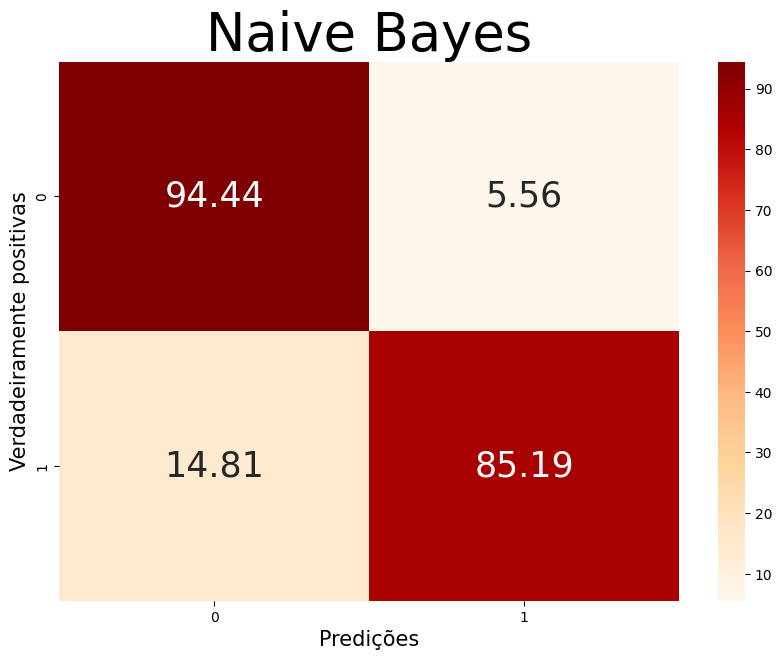

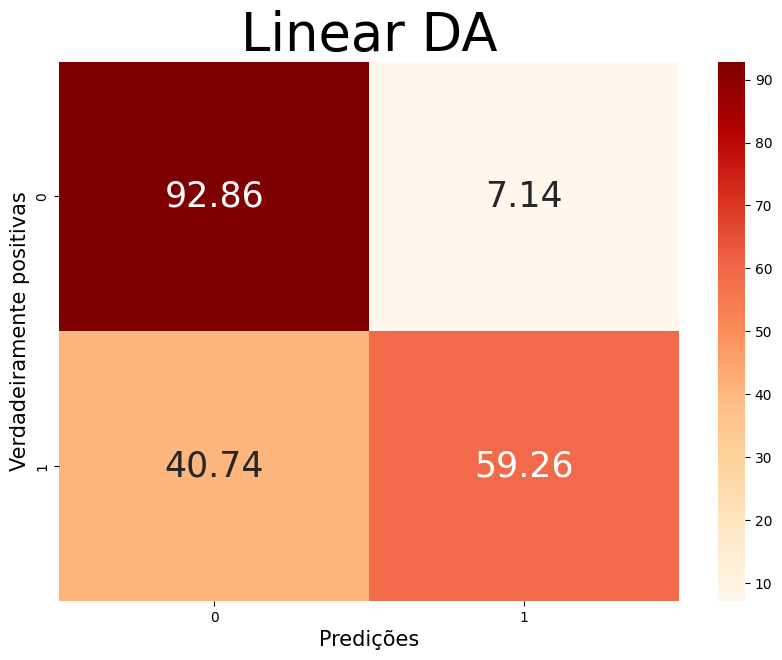

In [ ]:
# Initialize a dictionary to store the average confusion matrices of all the models
all_matrices = {}

classifiers = [
    LogisticRegression(solver="liblinear", random_state=42),
    KNeighborsClassifier(2),
    DecisionTreeClassifier(random_state= 42),
    RandomForestClassifier(random_state= 42),
    AdaBoostClassifier(random_state= 42),
    GradientBoostingClassifier(random_state= 42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
]

# Define a list of names corresponding to the classifiers
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
]

skf = StratifiedKFold(5)
# Loop with classifiers
for classifier, name in zip(classifiers, names):
    # Initialize a cumulative confusion matriX for this model
    cumulative_matriX = np.zeros((2, 2), dtype=int)

    # Loop about the folds (data set partitions)
    for fold, (train_indeX, test_indeX) in enumerate(skf.split(X, y)):
        X_train, X_test = X.iloc[train_indeX], X.iloc[test_indeX]
        y_train, y_test = y.iloc[train_indeX], y.iloc[test_indeX]

        # Training model
        classifier.fit(X_train, y_train)

        # Making predictions on the test set
        pred = classifier.predict(X_test)

        # Calculate the confusion matriX
        matriz = confusion_matriX(y_test, pred)

        # Add the confusion matriX to the cumulative_matriX
        cumulative_matriX += matriz

    # Calculate the mean of confunsion matriX
    average_matriX = cumulative_matriX / skf.n_splits

    # Normalize the confusion matriX to obtain percentages
    row_sums = average_matriX.sum(aXis=1, keepdims=True)
    normalized_matriX = (average_matriX / row_sums) * 100

    # Add the average to the matriX dictionary of all models
    all_matrices[name] = normalized_matriX

# Plot the average confusion matriX for each model
for name, matriz in all_matrices.items():
    plt.figure(figsize=(10, 7))
    sns.heatmap(matriz, annot=True, cmap='OrRd', fmt='.2f', annot_kws={"size": 25})
    plt.Xlabel('Predições', fontsize=15)
    plt.ylabel('Verdadeiramente positivas', fontsize=15)
    plt.title(f'{name}', fontsize=38)
    plt.savefig('/content/drive/MyDrive/Mestrado/Códigos_Bioinfo_e_docs_relacionados(menos_Python_colab)/Qualificação/Confunsion matriX/' + f'Matriz de confusão {name}.jpeg')
    plt.show()


# **Learning curves analysis**

**Performance Learning Curves:**

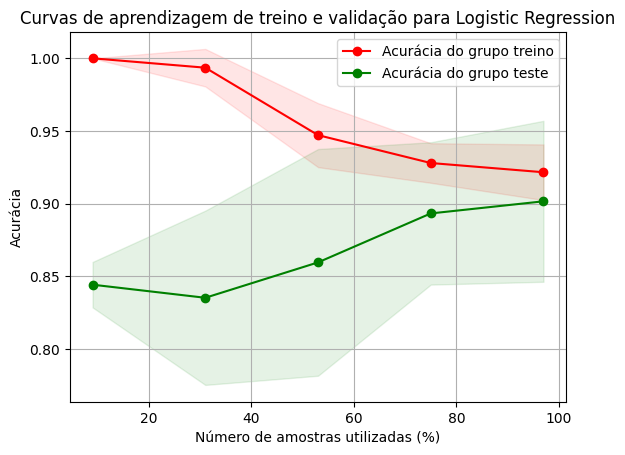

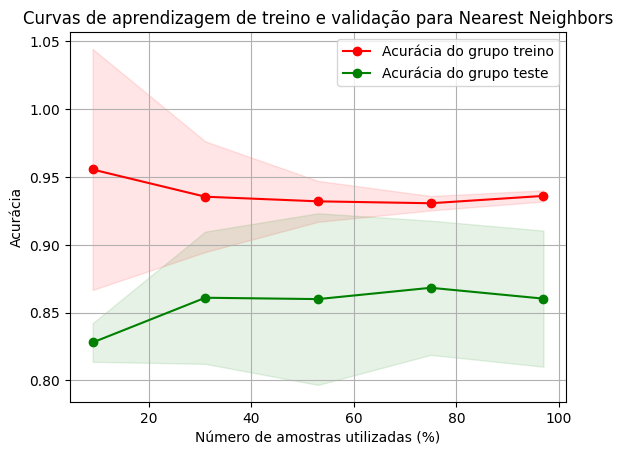

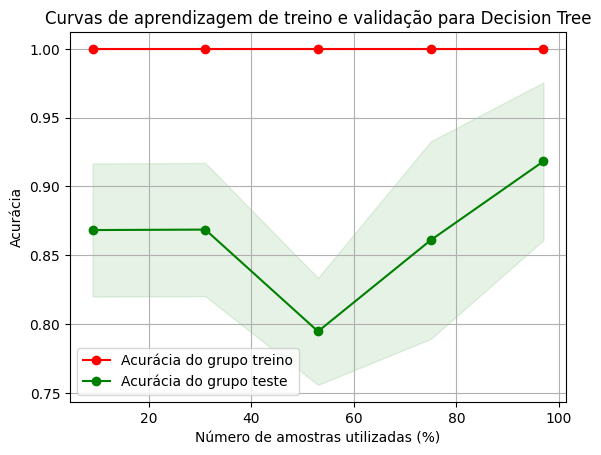

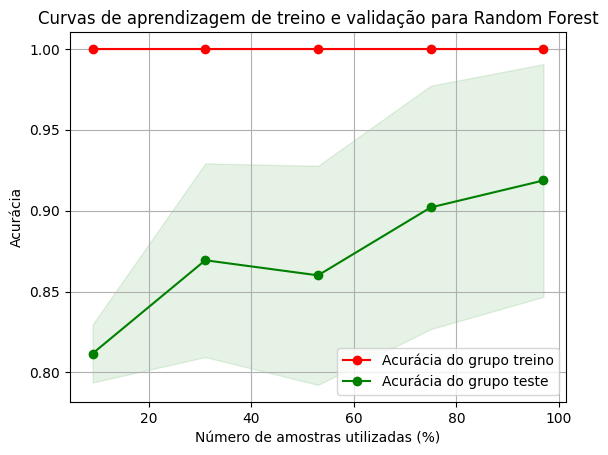

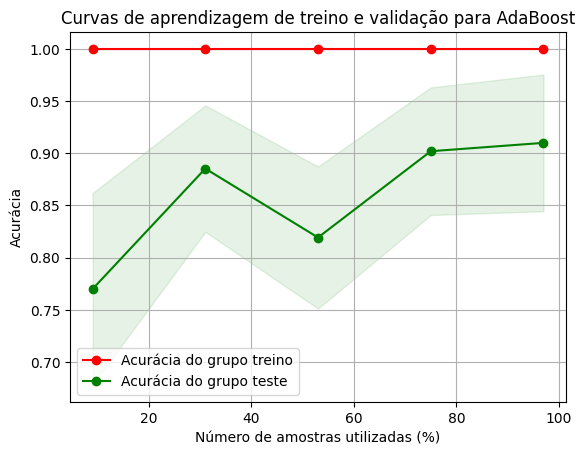

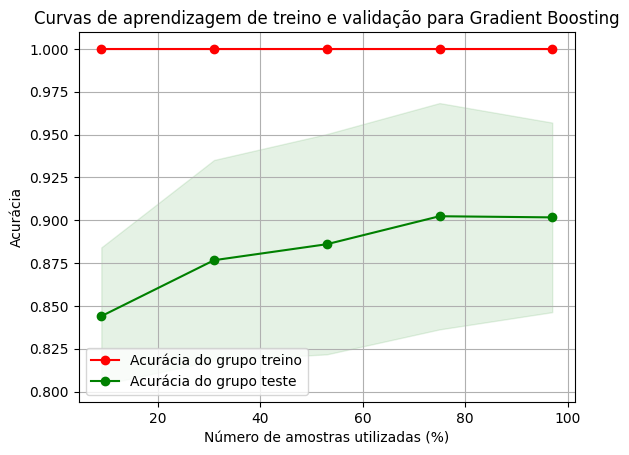

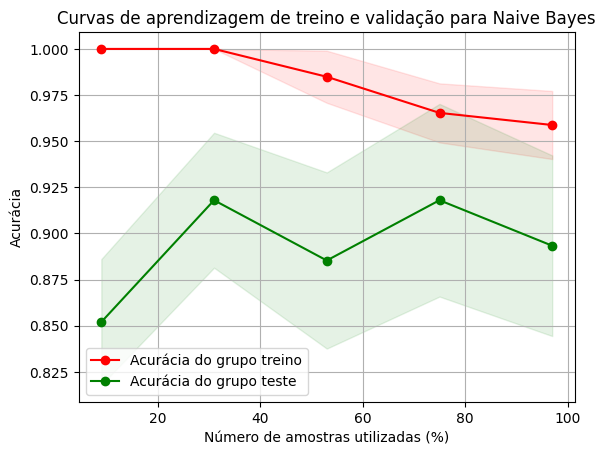

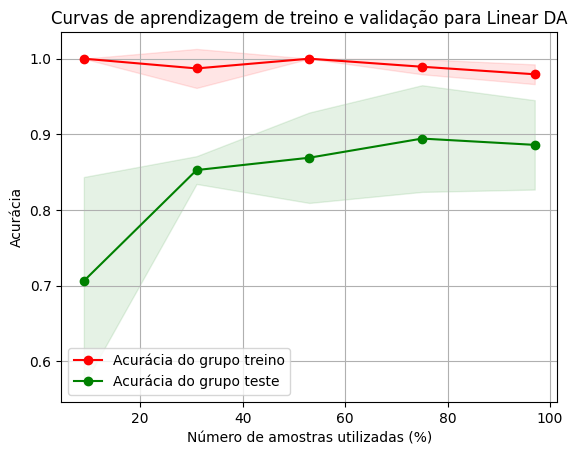

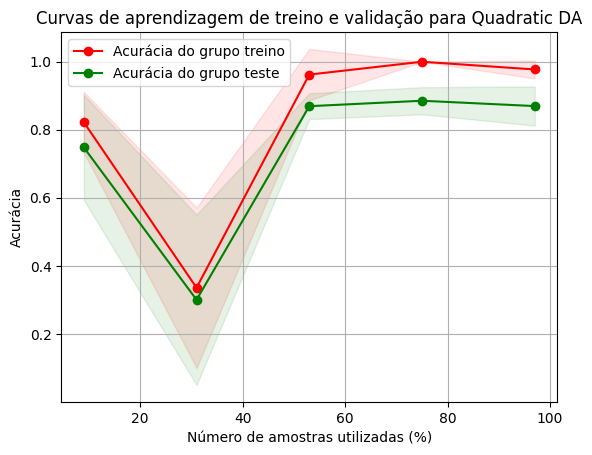

In [ ]:
# List of ML packages that we will run
classifiers = [
    LogisticRegression(solver="liblinear", random_state=42),
    KNeighborsClassifier(n_neighbors=2),
    DecisionTreeClassifier(random_state=42),
    RandomForestClassifier(random_state=42),
    AdaBoostClassifier(random_state=42),
    GradientBoostingClassifier(random_state=42),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
]

# Name of ML algorithms that we will use
names = [
    'Logistic Regression',
    'Nearest Neighbors',
    'Decision Tree',
    'Random Forest',
    'AdaBoost',
    'Gradient Boosting',
    'Naive Bayes',
    'Linear DA',
    'Quadratic DA',
]

# Define the training set sizes for which you want to calculate the learning curve
train_sizes = np.linspace(0.1, 1.0, 10)  # Aqui, estamos dividindo o intervalo de 0.1 a 1.0 em 10 partes iguais

for item, nome in zip(classifiers, names):
    train_scores_mean = []
    train_scores_std = []
    test_scores_mean = []
    test_scores_std = []

    # Divide the data into training and validation sets
    sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

    for train_indeX, val_indeX in sss.split(X, y):
        X_train, X_val = X.iloc[train_indeX], X.iloc[val_indeX]
        y_train, y_val = y.iloc[train_indeX], y.iloc[val_indeX]

        # Calculate the learning curves
        train_sizes_abs, train_scores, test_scores = learning_curve(item, X_train, y_train, cv=5, scoring='accuracy')

        # Calculate the mean and standard deviation of the training and test scores
        train_scores_mean.append(np.mean(train_scores, aXis=1))
        train_scores_std.append(np.std(train_scores, aXis=1))
        test_scores_mean.append(np.mean(test_scores, aXis=1))
        test_scores_std.append(np.std(test_scores, aXis=1))

# Plot the learning curve
    plt.figure()
    plt.title(f"Curvas de aprendizagem de treino e validação para {nome}")
    plt.Xlabel("Número de amostras utilizadas (%)")
    plt.ylabel("Acurácia")
    plt.grid()

# Calculate the averages and standard deviations over all the splits
    train_scores_mean = np.mean(train_scores_mean, aXis=0)
    train_scores_std = np.mean(train_scores_std, aXis=0)
    test_scores_mean = np.mean(test_scores_mean, aXis=0)
    test_scores_std = np.mean(test_scores_std, aXis=0)

    plt.fill_between(train_sizes_abs, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes_abs, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes_abs, train_scores_mean, 'o-', color="r",
             label="Acurácia do grupo treino")
    plt.plot(train_sizes_abs, test_scores_mean, 'o-', color="g",
             label="Acurácia do grupo teste")

    plt.legend(loc="best")
    plt.show()
